# Australian vs Global Salary Analysis in the AI/ML/Data Science Field
*Author: Rory O'Connor | Date: 2025-06-27*

## Introduction
This is a fun project I undertook to carry out some exploratory data analysis over a real world dataset form Kaggle

### Data Source
The dataset includes salaries from various countries and job roles in data science, sourced from Kaggle's open salary dataset.
https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs

### Project Objectives
To compare and contrast key characteristics of the Australian data job market with those of the global data job market, identifying trends, similarities, and differences that could inform job seekers, employers, and policymakers.
- Summarise salary distributions
- Investigate role-based, experience-based, and industry-based differences.
- Explore geographic and work arrangement patterns.
- Provide insights into how the Australian data job market aligns with or diverges from global trends.


In [18]:
# Getting started with the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import gaussian_kde


In [2]:
# load the dataset
df = pd.read_csv("salaries.csv")
# Display the first few rows of the dataset
print(df.head())

   work_year experience_level employment_type           job_title  salary  \
0       2025               SE              FT  Solutions Engineer  214000   
1       2025               SE              FT  Solutions Engineer  136000   
2       2025               MI              FT       Data Engineer  158800   
3       2025               MI              FT       Data Engineer  139200   
4       2025               EN              FT       Data Engineer   90000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         214000                 US           100   
1             USD         136000                 US           100   
2             USD         158800                 AU             0   
3             USD         139200                 AU             0   
4             USD          90000                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               AU  

### Data Quality
Since I haven't seen this data before, firstly I'll check to see if it is complete

In [3]:
# check for missing values
missing_values = df.isnull().sum()
# Display the count of missing values in each column
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


Great, the data is complete, so we don't need to worry about any missing values skewing our statistical Analysis.

Next lets see what data we are actually playing with here 

In [4]:
# Collect the column names
column_names = df.columns.tolist()
# Display the column names
print("Column names:", column_names)

Column names: ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


### Focus: Job Title
To start with, I'll do a little dive into the job titles that have the most entries, as these will paint a more statistically robust picture around patterns

In [5]:
# Lets aggreate the job_title and count the number of jobs for each title
job_counts = df['job_title'].value_counts()
# How many jobs are in this dataset?
print("Number of unique job titles:", len(job_counts))

Number of unique job titles: 390


In [6]:
# lets see the top 10 job titles
top_10_jobs = job_counts.head(10)
# Display the top 10 job titles
print("Top 10 job titles:\n", top_10_jobs)


Top 10 job titles:
 job_title
Data Scientist               17314
Software Engineer            15007
Data Engineer                14868
Data Analyst                 12381
Engineer                      9456
Machine Learning Engineer     8205
Manager                       6679
Analyst                       4364
Research Scientist            3202
Product Manager               2230
Name: count, dtype: int64


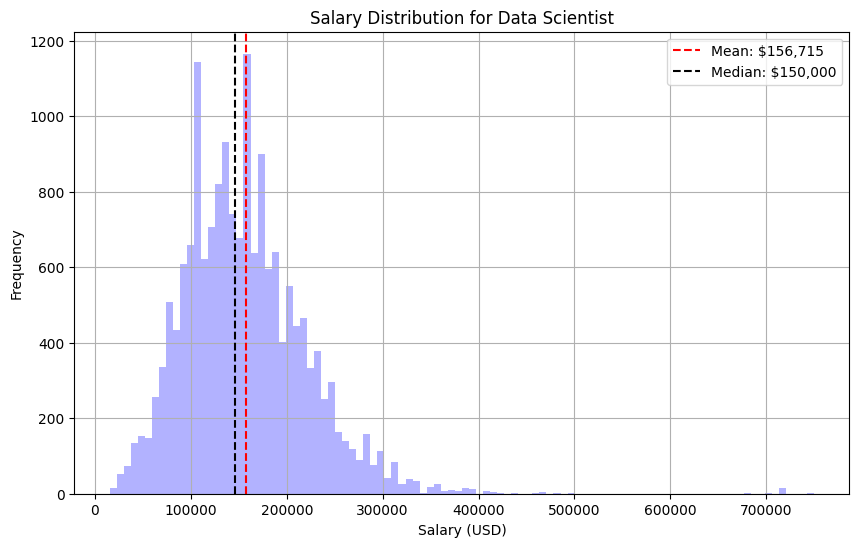

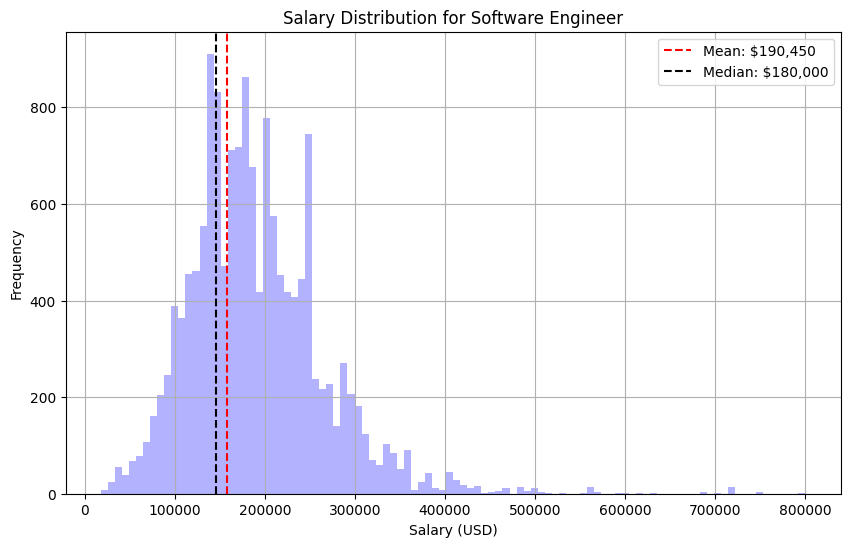

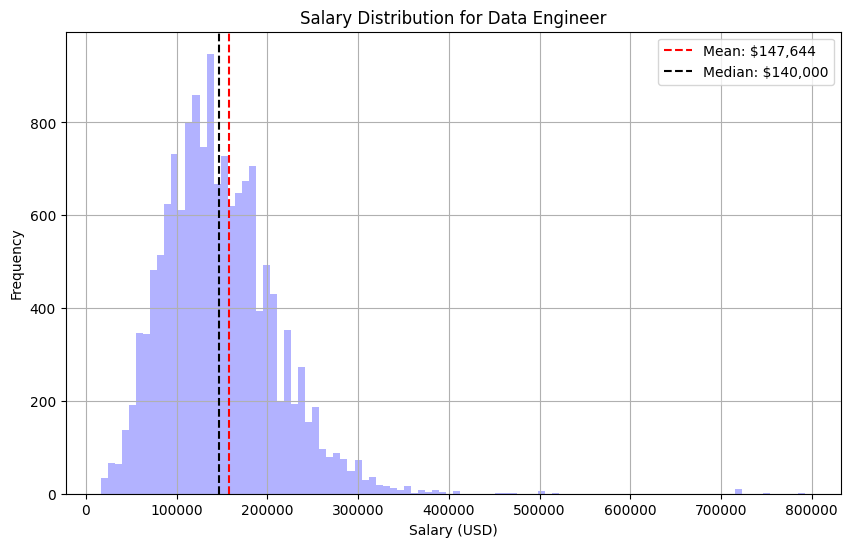

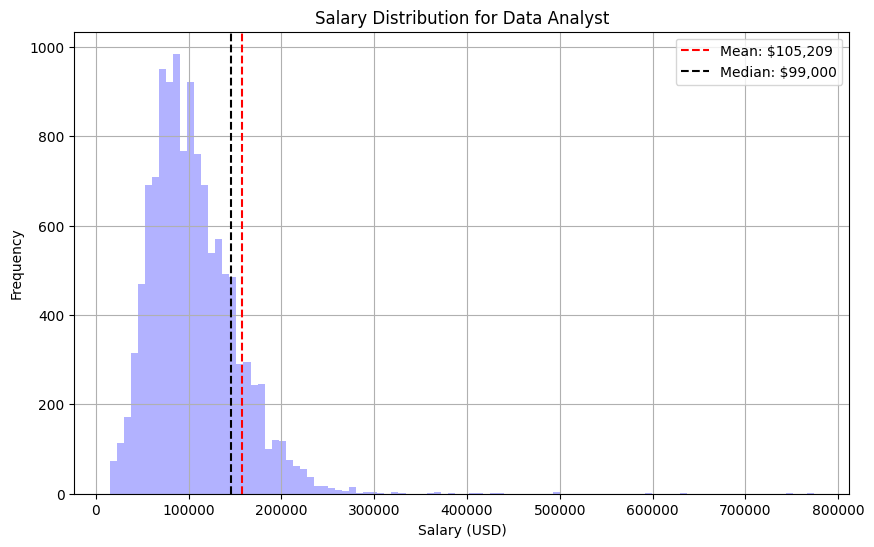

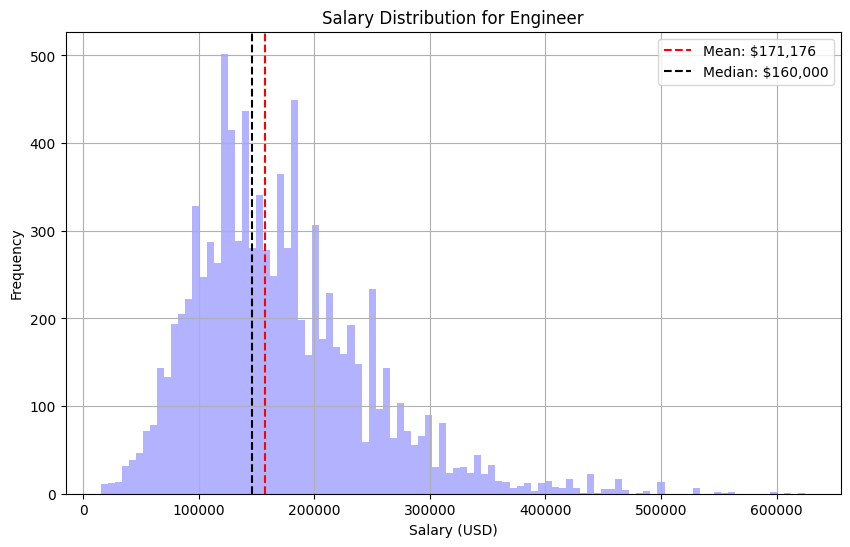

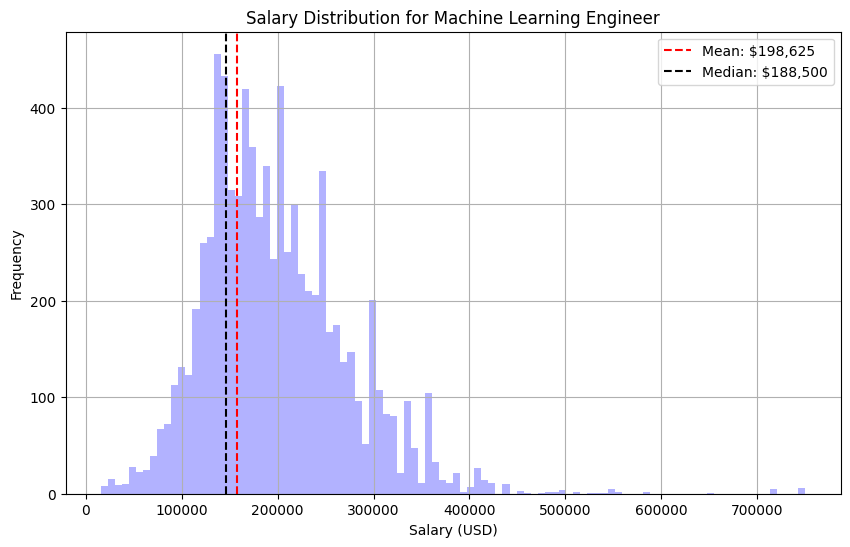

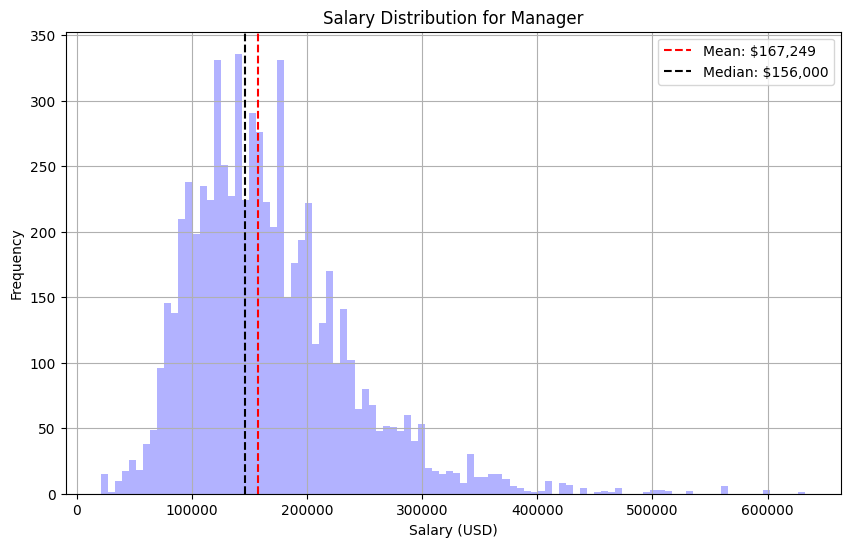

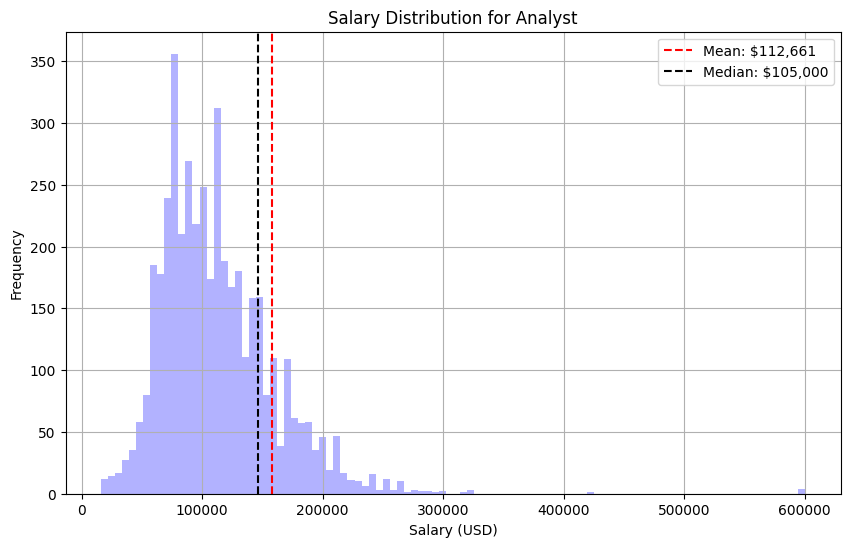

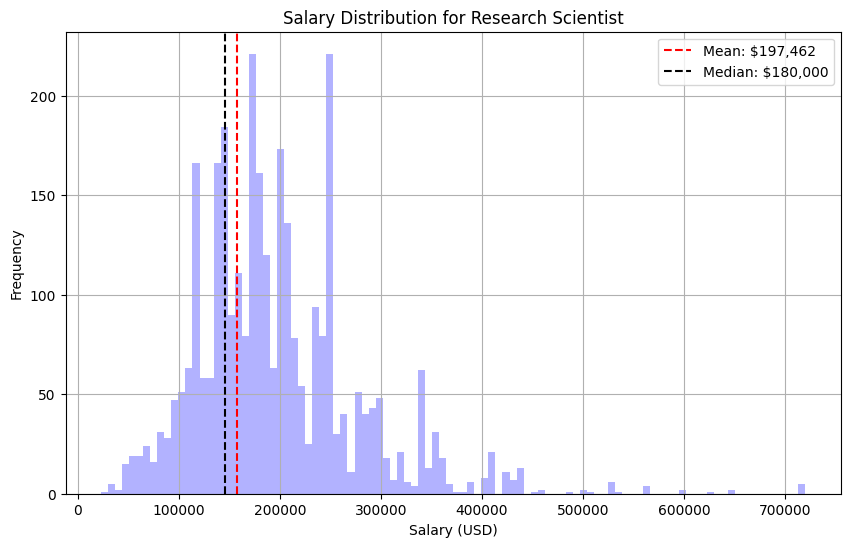

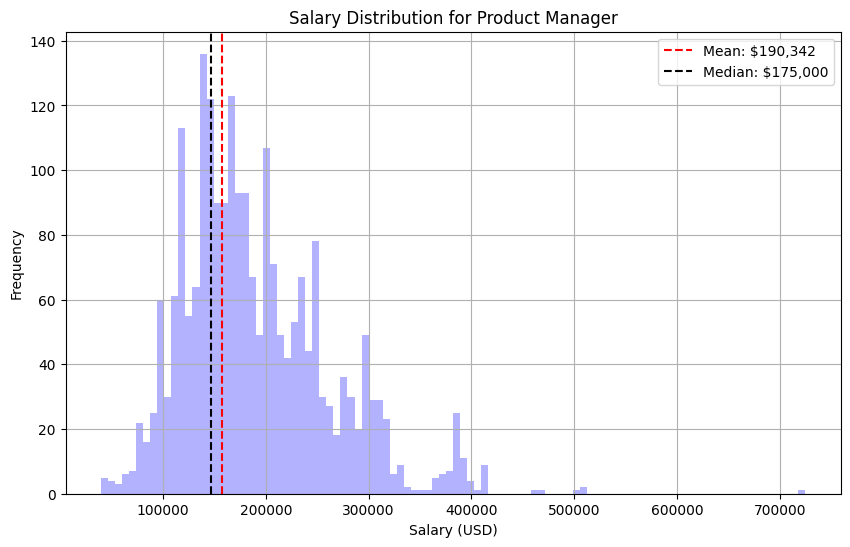

In [7]:
# Lets plot the top 10 job titles salary histograms
for job_title in top_10_jobs.index:
    plt.figure(figsize=(10, 6))
    job_data = df[df['job_title'] == job_title]
    plt.hist(job_data['salary_in_usd'], bins=100, alpha=0.3, color='blue')
    plt.axvline(df['salary_in_usd'].mean(), color='red', linestyle='--', label=f'Mean: ${job_data['salary_in_usd'].mean():,.0f}')
    plt.axvline(df['salary_in_usd'].median(), color='black', linestyle='--', label=f'Median: ${job_data['salary_in_usd'].median():,.0f}')

    plt.legend()
    plt.title(f'Salary Distribution for {job_title}')
    plt.xlabel('Salary (USD)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Plotly 
Ok there's clearly some trends. It would be useful to see the density curves associated with these histograms, one on top of the other, for a more interesting comparison. Lets use the Plotly libratry moving forward for nice interactive plots

In [19]:
fig = go.Figure()

for job_title in top_10_jobs.index:
    job_data = df[df['job_title'] == job_title]['salary_in_usd']
    density = gaussian_kde(job_data)
    x = np.linspace(job_data.min(), job_data.max(), 1000)
    fig.add_trace(go.Scatter(x=x, y=density(x), mode='lines', name=job_title))
fig.update_layout(
    title='Salary Density Curves for Top 10 Job Titles',
    xaxis_title='Salary in USD',
    yaxis_title='Density',
    template='plotly_white'
)
fig.show()

In [8]:
# Now lets look at the country codes used in the dataset
country_counts = df['employee_residence'].value_counts()
# List the unique country codes
print("Unique country codes:", country_counts.index.tolist())

Unique country codes: ['US', 'CA', 'GB', 'AU', 'NL', 'DE', 'FR', 'LT', 'AT', 'ES', 'IN', 'SK', 'PL', 'IE', 'LV', 'MX', 'BR', 'AR', 'IT', 'PH', 'ZA', 'NZ', 'PT', 'FI', 'CH', 'EG', 'CO', 'SG', 'JP', 'BE', 'GR', 'TR', 'CL', 'UA', 'EE', 'TW', 'MT', 'CY', 'IL', 'NG', 'KR', 'CZ', 'LB', 'SE', 'RO', 'PR', 'AM', 'JM', 'PE', 'HU', 'SI', 'NO', 'DK', 'MK', 'HR', 'KE', 'VN', 'CR', 'PK', 'EC', 'HK', 'ID', 'BG', 'RU', 'AE', 'LU', 'RS', 'SV', 'GH', 'DO', 'TH', 'MY', 'SA', 'UZ', 'HN', 'DZ', 'LS', 'PA', 'BO', 'XK', 'JO', 'CD', 'GE', 'VE', 'BA', 'MD', 'CF', 'TN', 'ZM', 'MU', 'RW', 'UG', 'OM', 'BM', 'AD', 'QA', 'IR', 'KW', 'AS', 'CN', 'IQ', 'JE']


### Australian Comparisons
Shifting the focus, lets see how the data generally trends between Australia and the rest of the world

In [ ]:
# lets do another histogram like before, but looking at Australian (AU) salaries against the rest of the world, normalized by the maximum bin frequency 

# load in the data
au_data = df[df['employee_residence'] == 'AU']['salary_in_usd']
other_data = df[df['employee_residence'] != 'AU']['salary_in_usd']

# Calculate means and medians
au_mean = au_data.mean()
au_median = au_data.median()
other_mean = other_data.mean()
other_median = other_data.median()

fig = go.Figure()

# AU Histogram
fig.add_trace(go.Histogram(
    x=au_data,
    name='AU',
    opacity=0.5,
    nbinsx=100,
    histnorm='probability density'
))

# Global Histogram
fig.add_trace(go.Histogram(
    x=other_data,
    name='Other Countries',
    opacity=0.5,
    nbinsx=100,
    histnorm='probability density'
))

# Add mean + median lines
for value, color, dashtype, label in [
    (au_mean, 'green', 'dot',  'AU Mean'),
    (au_median, 'blue', 'dash','AU Median'),
    (other_mean, 'red', 'dot', 'Global Mean'),
    (other_median, 'black','dash', 'Global Median')
]:
    fig.add_shape(
        type='line',
        x0=value, x1=value,
        y0=0, y1=1,  # y1 gets auto-scaled later
        xref='x', yref='paper',
        line=dict(color=color, width=2, dash=dashtype),
        name=label
    )
    # Add annotations if you want labels on the lines
    fig.add_annotation(
        x=value,
        y=1.02,  # Just above the plot
        yref='paper',
        text=label,
        showarrow=False,
        font=dict(color=color)
    )


# Overlay histograms
fig.update_layout(
    barmode='overlay',
    title='Salary Distribution: AU vs Other Countries',
    xaxis_title='Salary in USD',
    yaxis_title='Frequencty Density',
    template='plotly_white'
)

fig.show()
